<a href="https://colab.research.google.com/github/tatertot6000/DS-3010-Final/blob/main/LinReg/LinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


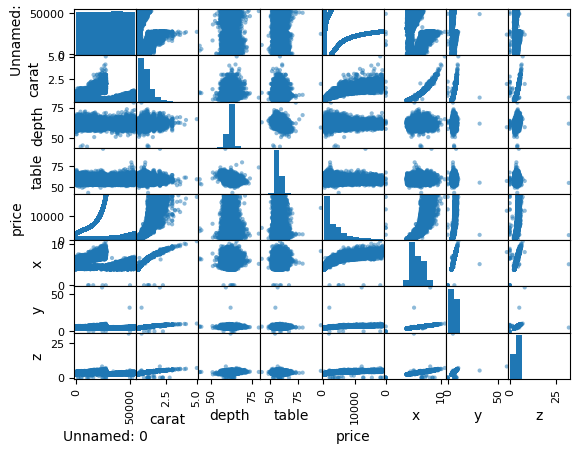

In [12]:
import numpy as np
import pandas as pd
#Reading in Data
Diamonds=pd.read_csv('/content/diamonds.csv')
Diamonds_Train = pd.read_csv('/content/diamonds_train.csv')
Diamonds_Test = pd.read_csv('/content/diamonds_test.csv')
Diamonds_Val = pd.read_csv('/content/diamonds_val.csv')
#Scatterplot matrix of training data
pd.plotting.scatter_matrix(Diamonds_Train)
#Correlation Matrix of training data without "cut", "color", "clarity" columns
corr = Diamonds.drop(columns=['cut', 'color', 'clarity']).corr()
corr.style.background_gradient(cmap='coolwarm')


In [24]:
#Create linear regression model with carat, x, y and z as predictors, price as response
import statsmodels.api as sm
X=Diamonds_Train[['carat', 'x', 'y', 'z']]
X = sm.add_constant(X)
y=Diamonds_Train['price']
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.301e+04
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:21:10   Log-Likelihood:            -3.7733e+05
No. Observations:               43152   AIC:                         7.547e+05
Df Residuals:                   43147   BIC:                         7.547e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1867.5841    116.721     16.000      0.000    1638.808    2096.360
carat       1.018e+04     70.390    144.631      0.000       1e+04    1.03e+04
x           -882.7343     42.907    -20.573      0.000    -966.832    -798.636
y            131.5235     25.895      5.079      0.000      80.769     182.278
z           -497.9840     40.856    -12.189      0.000    -578.062    -417.906
==============================================================================
Omnibus:                    11777.029   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           262493.544
Skew:                           0.787   Prob(JB):                         0.00
Kurtosis:                      14.980   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#Validate and show model summary
X_val=Diamonds_Val[['carat', 'x', 'y', 'z']]
X_val = sm.add_constant(X_val)
y_val=Diamonds_Val['price']
y_pred=model.predict(X_val)
model_val=sm.OLS(y_val,X_val).fit()
model_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     8330.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:21:12   Log-Likelihood:                -47160.
No. Observations:                5394   AIC:                         9.433e+04
Df Residuals:                    5389   BIC:                         9.436e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1815.5015    308.493      5.885      0.000    1210.731    2420.272
carat       1.031e+04    184.954     55.746      0.000    9947.850    1.07e+04
x          -3241.1130    363.910     -8.906      0.000   -3954.524   -2527.702
y           3187.0242    360.686      8.836      0.000    2479.934    3894.115
z          -1634.7417    191.283     -8.546      0.000   -2009.734   -1259.749
==============================================================================
Omnibus:                     1321.661   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39705.796
Skew:                           0.526   Prob(JB):                         0.00
Kurtosis:                      16.250   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""